# DataSet :
The provided dataset contains details about students' background and their academic achievements in three subjects: mathematics, reading, and writing. The dataset consists of the following attributes:
     1. Gender: The student's gender 
     2. Race/Ethnicity: The racial or ethnic group to which the student belongs.
     3. Parental Level of Education: The highest educational level attained by the student's parents or guardians (e.g., some college, associate's degree).
     4. Lunch: The type of lunch received by the student (e.g., standard, free/reduced).
     5. Test Preparation Course: Whether or not the student completed a test preparation course (e.g., completed, none).
     6. Math Score: Student's performance on math assessments.
     7. Reading Score:  Performance score for reading assessments
     8. Writing score: Performance rating for writing evaluations 

# Problem Statement:
The objective is to examine factors impacting students' academic achievement and create a forecasting model that can predict scores in math, reading & writing based on demographic info as well as other relevant features like gender, race/ethnicity, parental education, lunch type & test prep completion.By understanding how characteristics such as gender, race/ethnicity, parental education, lunch type,&test preparation affect students' performance, Educators & policymakers can implement focused interventions to support students achieve better outcomes. Moreover,predictive modeling could aid in identifying at-risk underperforming students & devising personalized strategies for their success

### DataSet URL : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [2]:

import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as seaborn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [3]:

data_frame = pd.read_csv('exams.csv')
data_frame.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [4]:
data_frame.shape

(1000, 8)

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
data_frame.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
data_frame.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,67.810,15.250196,15.0,58.0,68.0,79.25,100.0
reading score,1000.0,70.382,14.107413,25.0,61.0,70.5,80.00,100.0
writing score,1000.0,69.140,15.025917,15.0,59.0,70.0,80.00,100.0


In [8]:
data_frame.duplicated().sum(), len(data_frame)

(0, 1000)

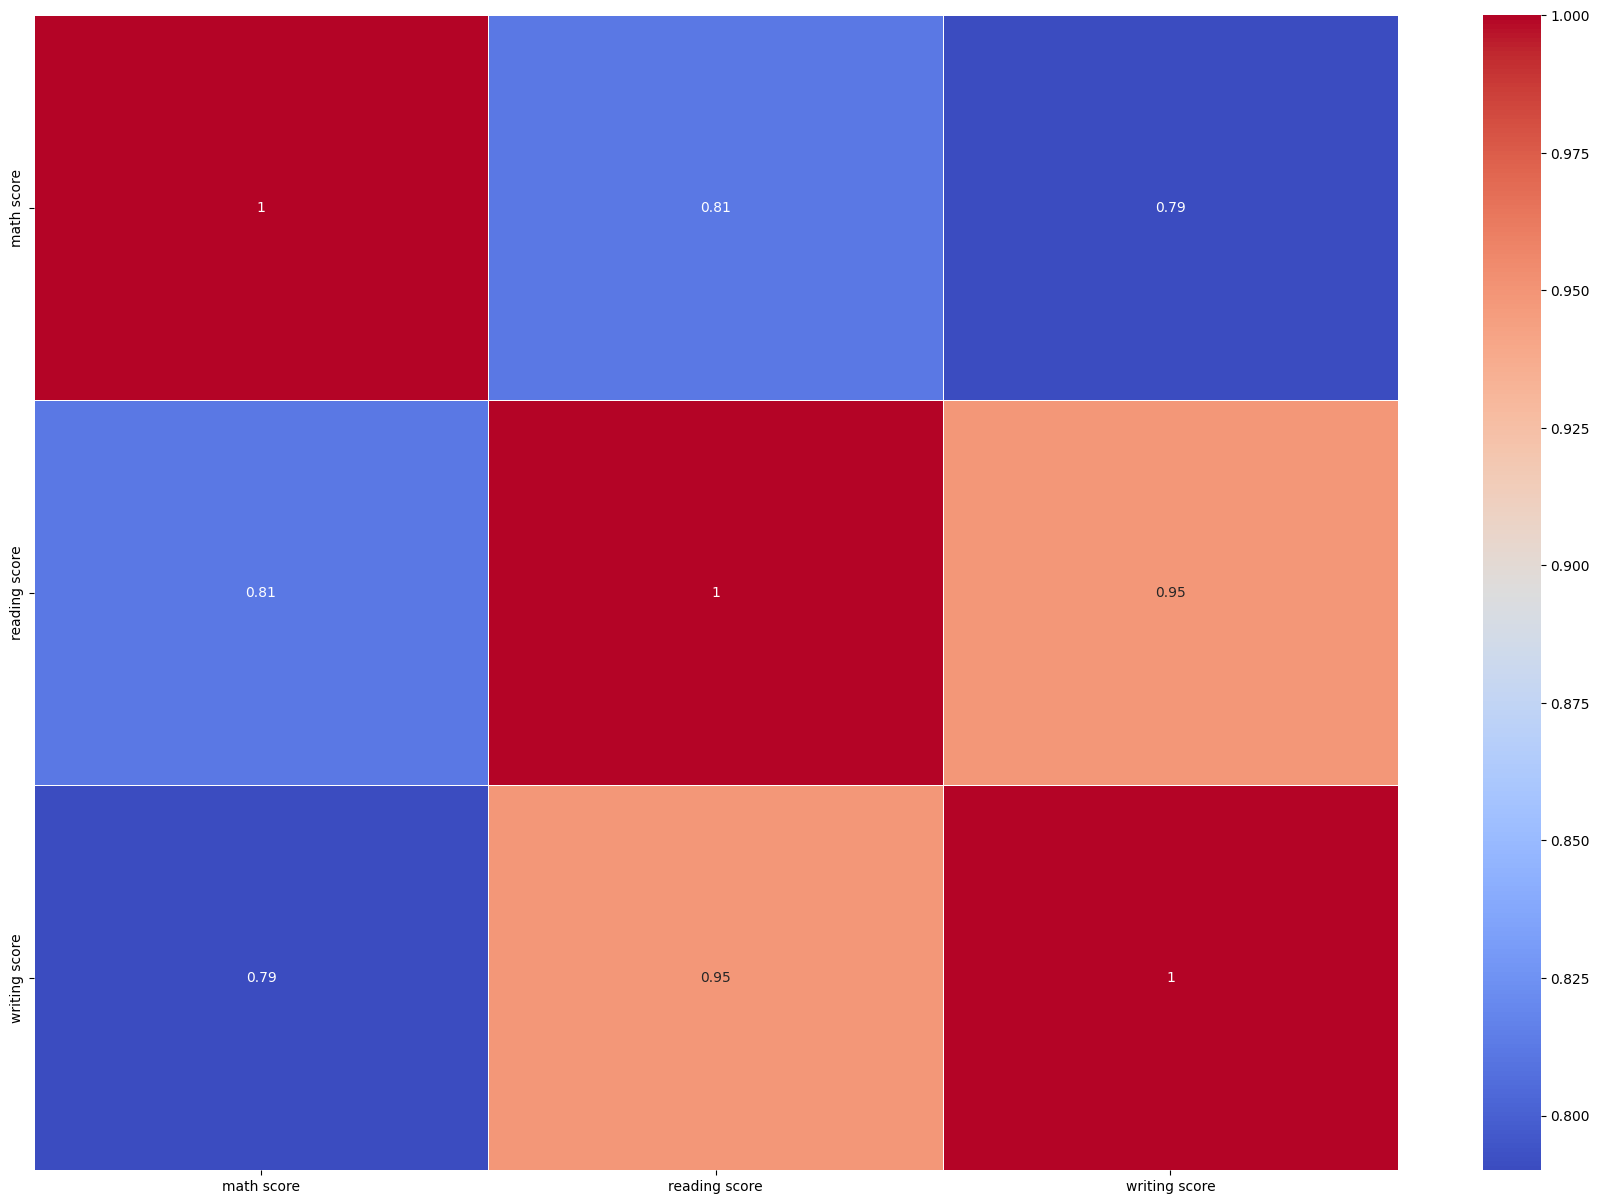

In [9]:
# Filter numerical columns
numerical_data_frame = data_frame.select_dtypes(include=['float64', 'int64'])

# Create the heatmap
pyplot.figure(figsize=(22, 15))
seaborn.heatmap(data=numerical_data_frame.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
pyplot.show()

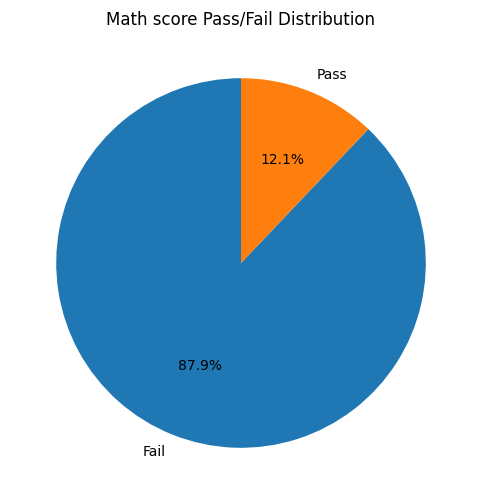

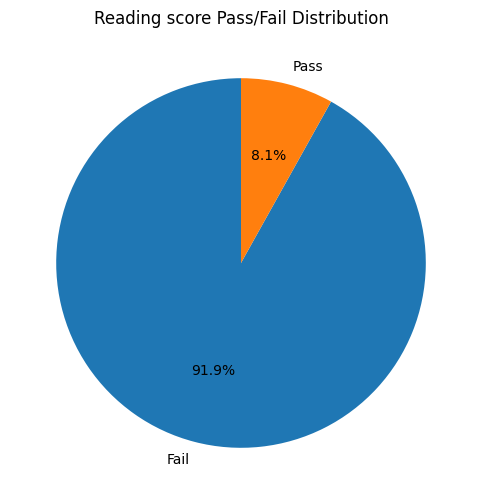

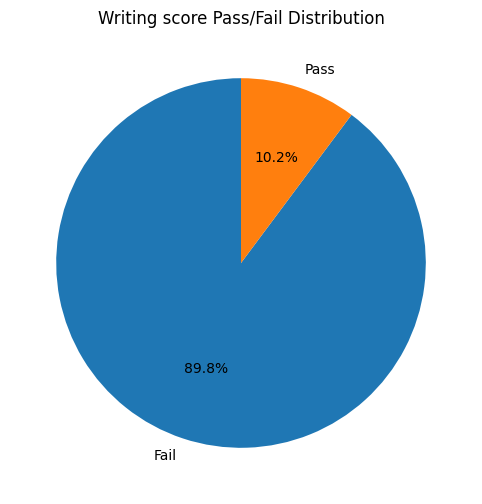

In [10]:
# Define the categorical features
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Define the numerical features
numerical_features = ['math score', 'reading score', 'writing score']
# Plot pie charts for numerical features
for feature in numerical_features:
    pyplot.figure(figsize=(8, 6))
    labels = ['Fail', 'Pass']  # You can adjust this based on your criteria for pass/fail
    pass_counts = data_frame[feature].apply(lambda x: 'Pass' if x >= 50 else 'Fail').value_counts()
    pyplot.pie(pass_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    pyplot.title(f"{feature.capitalize()} Pass/Fail Distribution")
    pyplot.show()

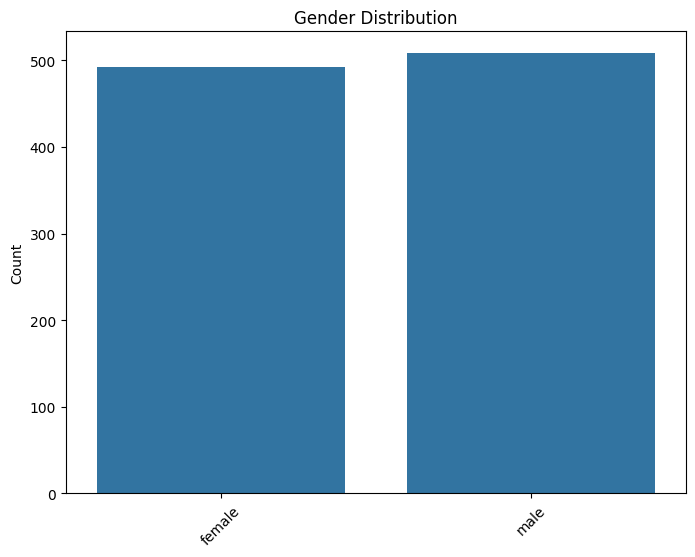

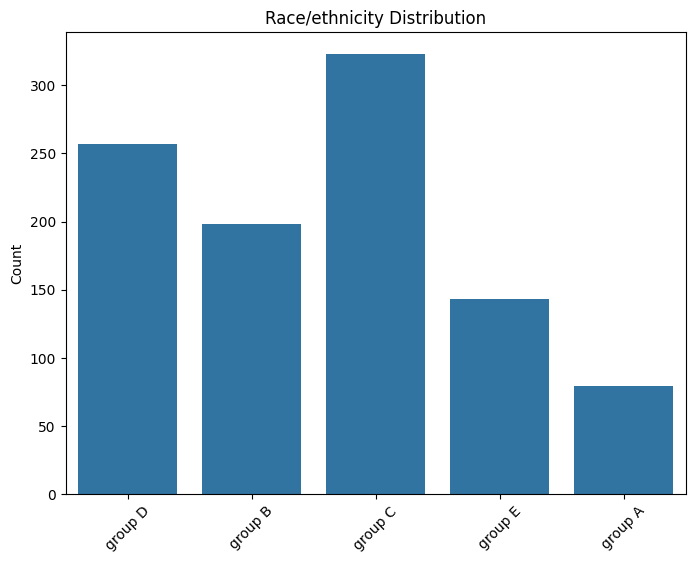

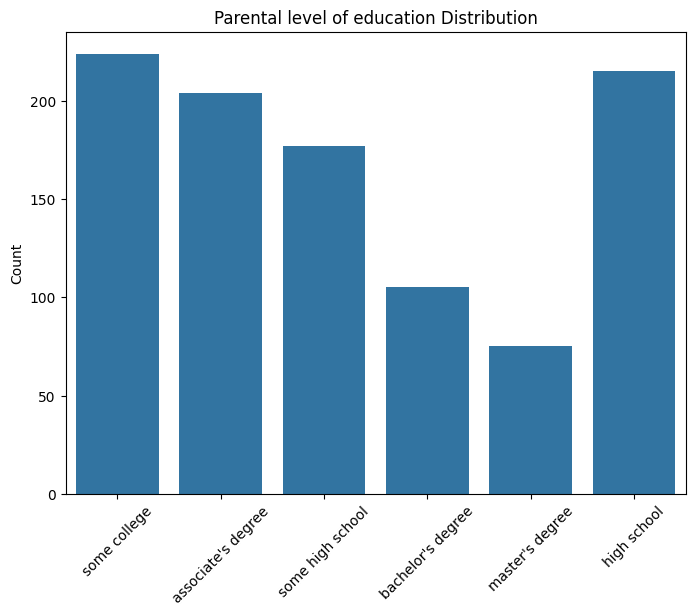

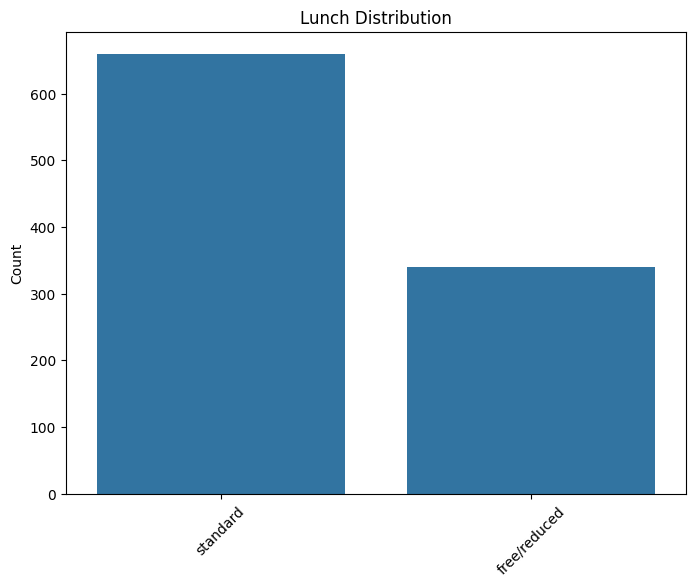

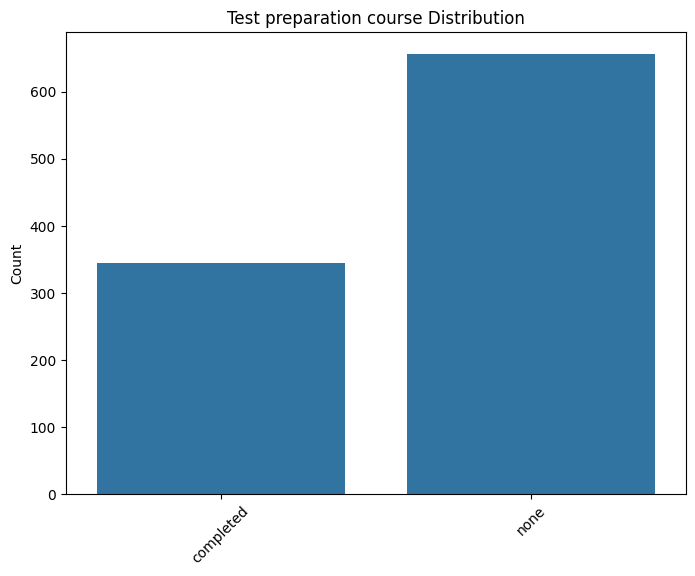

In [11]:
# Plot bar charts for categorical features
for feature in categorical_features:
    pyplot.figure(figsize=(8, 6))
    seaborn.countplot(x=feature, data=data_frame)
    pyplot.title(f"{feature.capitalize()} Distribution")
    pyplot.xlabel("")
    pyplot.ylabel("Count")
    pyplot.xticks(rotation=45)
    pyplot.show()

In [12]:
# lets create target column 
avg = data_frame[['math score','reading score','writing score']].mean(axis=1)  
data_frame['avarage score']= avg 
data_frame['avarage score']

0      69.000000
1      92.000000
2      70.000000
3      67.666667
4      84.666667
         ...    
995    75.000000
996    70.666667
997    79.666667
998    71.333333
999    50.000000
Name: avarage score, Length: 1000, dtype: float64

In [13]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to categorical columns
data_frame['gender'] = label_encoder.fit_transform(data_frame['gender'])
data_frame['race/ethnicity'] = label_encoder.fit_transform(data_frame['race/ethnicity'])
data_frame['parental level of education'] = label_encoder.fit_transform(data_frame['parental level of education'])
data_frame['lunch'] = label_encoder.fit_transform(data_frame['lunch'])
data_frame['test preparation course'] = label_encoder.fit_transform(data_frame['test preparation course'])



In [14]:
data_frame.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avarage score
0,0,3,4,1,0,59,70,78,69.000000
1,1,3,0,1,1,96,93,87,92.000000
2,0,3,4,0,1,57,76,77,70.000000
3,1,1,4,0,1,70,70,63,67.666667
4,0,3,0,1,1,83,85,86,84.666667


In [15]:
X = data_frame.drop('avarage score', axis=1)
y = data_frame['avarage score']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:


# Instantiate the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate the mean squared error
mse_train_model = mean_squared_error(y_train, y_pred_train)
mse_test_model = mean_squared_error(y_test, y_pred_test)



In [18]:


# Instantiate the model
model_rf = RandomForestRegressor()

# Fit the model
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_train_rf = model_rf.predict(X_train)
y_pred_test_rf = model_rf.predict(X_test)

# Calculate the mean squared error
mse_train_model_rf = mean_squared_error(y_train, y_pred_train_rf)
mse_test_model_rf = mean_squared_error(y_test, y_pred_test_rf)



In [19]:


# Instantiate the model
model_gb = GradientBoostingRegressor()

# Fit the model
model_gb.fit(X_train, y_train)

# Make predictions
y_pred_train_gb = model_gb.predict(X_train)
y_pred_test_gb = model_gb.predict(X_test)

# Calculate the mean squared error
mse_train_model_gb = mean_squared_error(y_train, y_pred_train_gb)
mse_test_model_gb = mean_squared_error(y_test, y_pred_test_gb)




In [20]:
print(f"Train MSE of LinearRegression: {mse_train_model}")
print(f"Test MSE of LinearRegression: {mse_test_model}")
print('==' * 20)
print(f"Train MSE of Random Forest: {mse_train_model_rf}")
print(f"Test MSE of Random Forest: {mse_test_model_rf}")
print('==' * 20)
print(f"Train MSE of Gradient Boosting: {mse_train_model_gb}")
print(f"Test MSE of Gradient Boosting: {mse_test_model_gb}")

Train MSE of LinearRegression: 1.1332775764405055e-28
Test MSE of LinearRegression: 9.649346592663416e-29
Train MSE of Random Forest: 0.10535375000000101
Test MSE of Random Forest: 0.41379499999999775
Train MSE of Gradient Boosting: 0.14801776759408605
Test MSE of Gradient Boosting: 0.30259972302935817


In [21]:
# Based on the provided Mean Squared Error (MSE) values, Linear Regression outperforms Random Forest Regressor 
# and Gradient Boosting Regressor on both training and testing datasets.
# Its significantly lower MSE values suggest a more accurate fit and better generalization ability,
# making Linear Regression the preferred choice for this regression task.

In [22]:


# Define the model
model_lr = Ridge()

# Define the hyperparameters to tune
param_grid = {'alpha': [0.1, 1, 10, 100]}  # Regularization strength

# Perform Grid Search CV
grid_search_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lr.fit(X_train, y_train)

# Get the best estimator
best_lr_model = grid_search_lr.best_estimator_

# Make predictions
y_pred_train_lr = best_lr_model.predict(X_train)
y_pred_test_lr = best_lr_model.predict(X_test)

# Calculate the mean squared error
mse_train_model_lr = mean_squared_error(y_train, y_pred_train_lr)
mse_test_model_lr = mean_squared_error(y_test, y_pred_test_lr)

print(f"Best Linear Regression Model: {best_lr_model}")
print(f"After tuning the Train MSE : {mse_train_model_lr}")
print(f"After tuning the Test MSE: {mse_test_model_lr}")


Best Linear Regression Model: Ridge(alpha=0.1)
After tuning the Train MSE : 1.1125892019999137e-11
After tuning the Test MSE: 9.896286980021053e-12


In [23]:
# The best-performing Linear Regression model after tuning is Ridge Regression with an alpha value of 0.1,
# exhibiting exceptionally low Mean Squared Error (MSE) values on both training and testing datasets, 
# indicating precise fitting and robust generalization.

In [24]:


# Calculate R-squared
train_model_r2 = r2_score(y_train, y_pred_train_lr)
test_model_r2 = r2_score(y_test, y_pred_test_lr)

# Calculate the mean absolute error (MAE)
train_model_mae = mean_absolute_error(y_train, y_pred_train_lr)
test_model_mae = mean_absolute_error(y_test, y_pred_test_lr)

print(f"R-squared of Trained Model: {train_model_r2}")
print(f"R-squared of Test Model: {test_model_r2}")
print(f"MAE of Trained Model: {train_model_mae}")
print(f"MAE of Test Model: {test_model_mae}")


R-squared of Trained Model: 0.9999999999999452
R-squared of Test Model: 0.9999999999999418
MAE of Trained Model: 2.708523234646876e-06
MAE of Test Model: 2.51159354812458e-06


In [25]:
# The Ridge Regression model fits the data extremely well,
# explaining almost all of the variation in both the training and testing datasets. Additionally, 
# it makes very accurate predictions with very small average differences between the predicted and actual values.